# **GEOET - Soil Evaporation Penman-Monteith FAO** 
Authors: Concetta D'Amato, Michele Bottazzi and Riccardo Rigon. 

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
___


## **Evaporation from soil**

Evaporation from soil is computed with a **Penman-Monteith FAO model**, with specific coefficients for soil evaporation depending on the case study and considering the *net radiation* that overcome plant and affects the soil.

\begin{equation}
ET_{0} =  \dfrac{0.408\cdot \Delta\cdot (R_{n} - G)+\gamma\cdot u_{2}\cdot(e_{s}-e)\cdot\frac{C_{p}}{T+273}}{\lambda(\Delta+\gamma\cdot(1+C_{d}\cdot u_{2}))}
\end{equation}

where:
- $ET_{0}$ is expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $T$ is the mean daily or hourly air temperature expressed in (°C) ; 
- $u_{2}$ is the wind speed in ($m\cdot s^{−1}$); 
- $e_{s}$ is the mean saturation vapor-pressure expressed in ($kP_{a}$); 
- $e$ is the mean actual vapor-pressure; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 
- $\lambda$ is the latent heat constant constant expressed in ($J \cdot$ $kg^{−1}$); 
- $C_{d}$ is a coefficient equal to 0.34 and $C_{p}$ is a coefficient equal to 900 in the case of a daily time step and equal to 37 in the case of a hourly time step.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import os

In [4]:
oms_project_path = os.path.dirname(os.getcwd())
os.chdir(oms_project_path+'/output/Cavone/1')
#os.listdir()

## Read the Penman Monteith FAO output

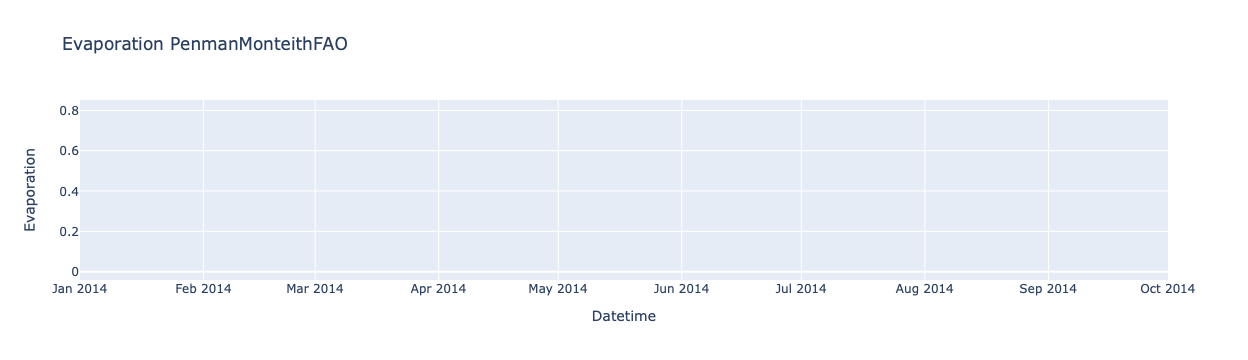

In [10]:
df = pd.read_csv('Potential_Evaporation_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','Evaporation']
fig = px.line(df, x='Datetime', y='Evaporation', title='Evaporation PenmanMonteithFAO')
fig.update_traces(line_color='green')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

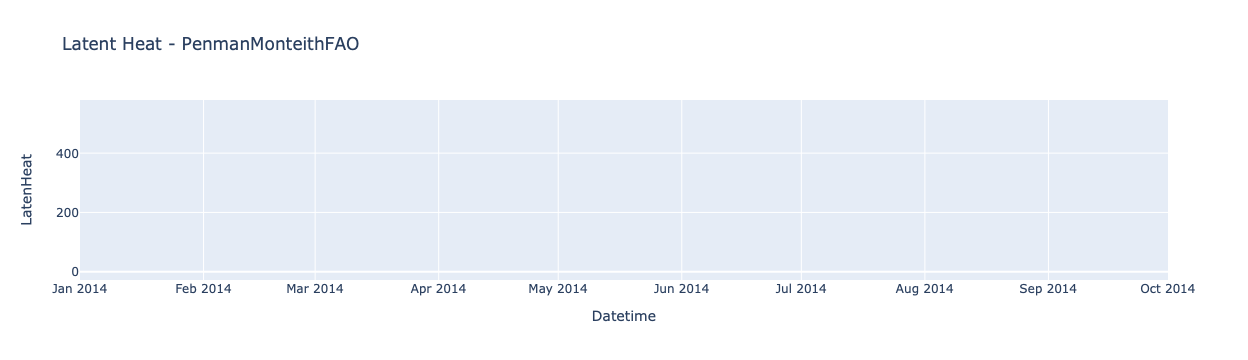

In [11]:
df2 = pd.read_csv('Potential_FluxEvaporation_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','LatenHeat']
fig = px.line(df2, x='Datetime', y='LatenHeat', title='Latent Heat - PenmanMonteithFAO')
fig.update_traces(line_color='red')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

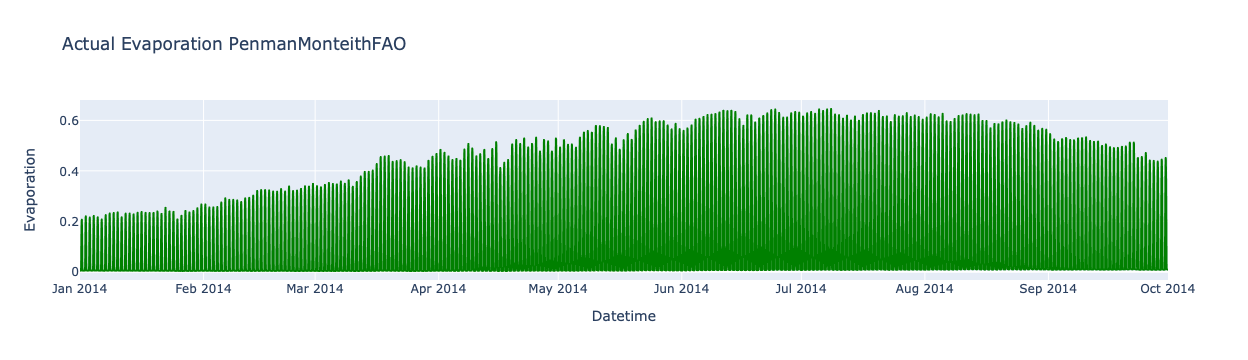

In [12]:
df3 = pd.read_csv('Actual_Evaporation_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['Datetime','Evaporation']
fig = px.line(df3, x='Datetime', y='Evaporation', title='Actual Evaporation PenmanMonteithFAO')
fig.update_traces(line_color='green')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

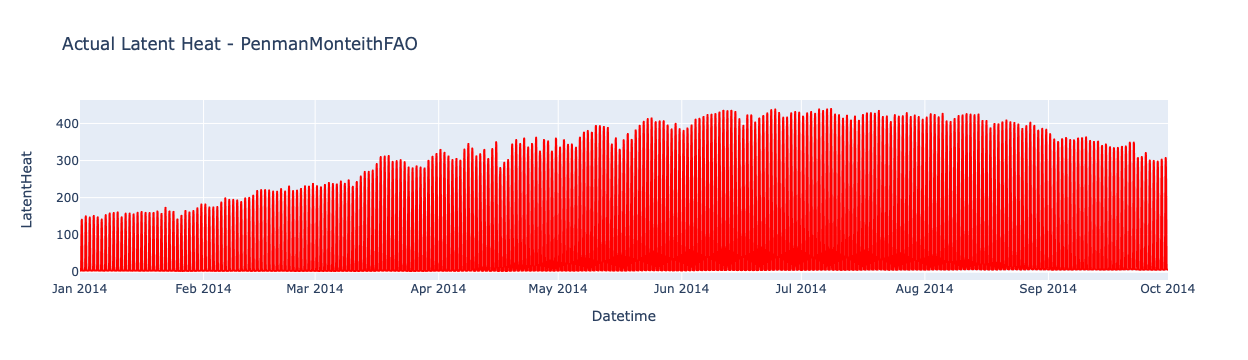

In [13]:
df4 = pd.read_csv('Actual_FluxEvaporation_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['Datetime','LatentHeat']
fig = px.line(df4, x='Datetime', y='LatentHeat', title='Actual Latent Heat - PenmanMonteithFAO')
fig.update_traces(line_color='red')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

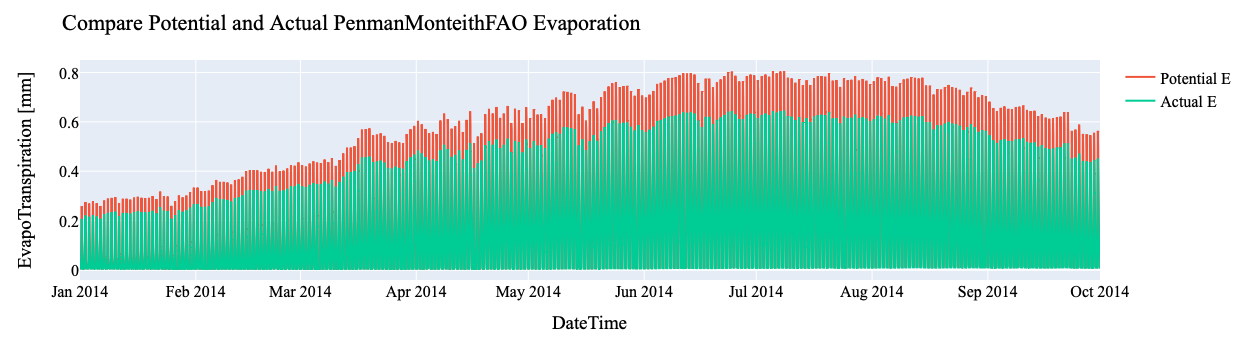

In [14]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['Evaporation'], mode='lines', name='Potential E'))
fig.add_trace(go.Scatter(x=df3['Datetime'], y=df3['Evaporation'], mode='lines', name='Actual E'))

fig.update_layout(
    title='Compare Potential and Actual PenmanMonteithFAO Evaporation ',
    xaxis_title="DateTime",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="EvapoTranspiration [mm]",
    #legend_title="Date",
    font=dict(size=16))
fig.show()